#### Analysing the first lot of simulation that were run on AWS (01/03/2021).

#### TODO 06/03/21:
- ~~rerun single simulations with new data collector~~
- ~~check offset distributions~
- ~~modify timeline flexibility functionality accordingly...~~
- ~~check other outputs~~
- ~~write network data collector ~~
- check and write other required data collectors
- run single sims with and without: budget, timeline, training
- Add to anlaysis script: linking worker 'contributes' column to projects table to compute risk, success, prob for each workers projects
- Add to anlaysis script: using worker 'contributes' column to  compute number of times they contribute each hard skill
- Add to anlaysis script: compute time to replacement from worker output table



#### FURTHER TODO:

- ~~Prevent zero probabilites: if optimsation fails, use smart guess.~~
- ~~Add data collector method for project start times and offsets.~~
- ~~Run diagnostic simulations x 2 without budgetary constraint (test no nulls w/o budget, test no zero probs after above change,~~test offset distributions - as expected?) - still gettings NULL and zero probs. Looking in mesa server sims: random team allocation is producing null teams because select_Team is returning teams that exceed budget. Basin is also producing teams that exceed budget!! Shit...  

DO: remove diagnostic print (null project) statements from org.py. Rerun diagnostic simulations in c6g w/o budget constraint. Make smart_guess and smart_step respect constraints. Replace solver output with initial guess if sum(x)==0. Check and remove assert test_constraints statement in opti.py


- (Do niter=0 in parallel)
- ~~Make smart_guess respect budget constraints~~
- ~~Confirm that smart_step is respecting budget constraint~~
- Write unit tests for optimiser (e.g. confirm all constraints are respected)
- ~~Add data collector method for budgets:~~ Plot distribution of budgets (relative).
- Add any further data collectors required for testing hypotheses (e.g. save network)
- Run simulations x 3 (with budgetary constraint)

Questions:
- Is the budget shown in the scatter plot the 'flexed' budget?
- Is budget copied across (incuding flex) when using predefined projects?
- Does a 1000 worker simulation take 56 hours on my new computer?!

In [3]:
#DATA_DIR = '../simulation_io/single_runs_010321/'
#DATA_DIR = '../simulation_io/diagnostics_020321/'
#DATA_DIR = '../simulation_io/single_runs_040321/'
DATA_DIR = '../simulation_io/diagnostics_060321/'

In [8]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
MODEL_DIR = os.path.realpath(os.path.dirname('..\superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))
from superscript_model import model

In [10]:
net = nx.read_gpickle('../simulation_io/network_timestep_50.gpickle')

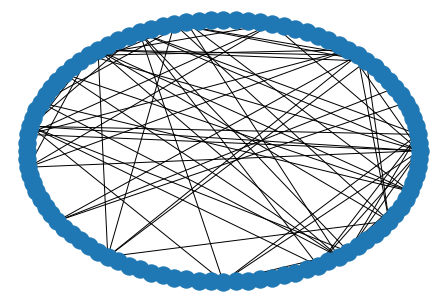

In [16]:
nx.draw(net, pos=nx.circular_layout(net))

In [29]:
net.nodes[2]['agent'][0].skills.hard_skills

{'A': 4.851495,
 'B': 0.7901386271387231,
 'C': 2.237910102656167,
 'D': 1.8651241305249973,
 'E': 3.33632012608864}

In [86]:
with open('../simulation_io/diagnostics_070321/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    test = pickle.load(ifile)
    
with open('../simulation_io/diagnostics_070321/tracked_agents_wc_100_np_2_ts_10.pickle', 'rb') as ifile:
    test_agents = pickle.load(ifile)

In [87]:
test

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,ovr_prob_cpt,skill_balance_prob_cpt,creativity_match_prob_cpt,risk_prob_cpt,chemistry_prob_cpt,team_budget,team_ovr,team_creativity_match,team_size
0,1,0.000000,5,44.0,False,False,0,0,0,17.269145,-27.043536,-29.994170,0.00,5.000000,13.815316,23.025526,8.833541,3.0
1,3,0.000000,25,62.0,False,False,0,0,1,22.221040,-17.621362,4.870135,-15.00,5.000000,28.146651,29.628053,0.137249,4.0
2,0,0.000000,5,69.0,False,False,1,1,1,19.141005,-26.642913,-29.985953,0.00,3.333333,33.177742,25.521340,7.954210,3.0
3,2,0.014106,25,29.0,False,False,0,0,1,14.953315,-1.857549,-1.685134,-15.00,5.000000,15.950203,19.937753,0.345492,3.0
4,4,0.000000,25,82.5,False,False,0,0,2,37.126516,-12.763546,-18.653035,-15.00,5.000000,49.502021,49.502021,1.259929,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,192,0.000000,10,10.0,True,False,0,0,96,0.000000,0.000000,10.000000,3.75,0.000000,NaN,NaN,NaN,NaN
188,188,0.000000,25,41.0,False,False,0,0,94,27.327482,-22.320623,-26.598008,-15.00,5.000000,25.505650,36.436643,2.464518,4.0
189,184,0.198011,5,33.0,False,False,2,2,94,36.881643,-2.203661,-19.043553,0.00,4.166667,29.505315,49.175525,1.294951,6.0
190,190,0.081021,5,38.0,False,False,0,0,95,39.971897,-11.519822,-24.635694,0.00,4.285714,23.983138,53.295862,2.009112,7.0


In [88]:
test_agents

now                                        contributes  \
Step AgentID                                                           
1    0          1  {2: {'A': [], 'B': [], 'C': [], 'D': [4], 'E':...   
     1          1  {9: {'A': [], 'B': [], 'C': [18], 'D': [18], '...   
     2          1  {6: {'A': [13], 'B': [13], 'C': [13], 'D': [13...   
     3          1                                                 {}   
     4          1  {8: {'A': [15], 'B': [], 'C': [], 'D': [], 'E'...   
...           ...                                                ...   
10   132       10                                                 {}   
     133       10                                                 {}   
     134       10                                                 {}   
     135       10                                                 {}   
     136       10                                                 {}   

                    ovr                                        hard_skills  \
Step AgentID                                                                 
1    0        55.368049  {'A': 1.3248327977995027, 'B': 3.7137655326065...   
     1        52.738067  {'A': 0.233060061702996, 'B': 0.0, 'C': 3.1863...   
     2        44.394076  {'A': 0.173912797011166, 'B': 3.47916042768349...   
     3        67.565969  {'A': 3.433851163924163, 'B': 0.48184450766421...   
     4        40.631312  {'A': 1.3121563747006915, 'B': 0.9923793478816...   
...                 ...                                                ...   
10   132      28.251619  {'A': 0.09592651151293319, 'B': 2.904378699215...   
     133      33.354350  {'A': 1.4256181394899903, 'B': 2.9235234816190...   
     134      66.755726  {'A': 1.923455412734968, 'B': 4.60449762423335...   
     135      70.822403  {'A': 1.1803458702453513, 'B': 2.9922992370512...   
     136      52.216933  {'A': 2.6824263391089262, 'B': 1.2009120120110...   

                                              training  \
Step AgentID                                             
1    0        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     1        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     2        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     3        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     4        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
...                                                ...   
10   132      {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     133      {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     134      {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     135      {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     136      {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   

                                                    skill_decay  \
Step AgentID                                                      
1    0        {'A': -0.013382149472722205, 'B': -0.037512783...   
     1                 {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     2                 {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     3        {'A': -0.03468536529216326, 'B': -0.0048671162...   
     4                 {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
...                                                         ...   
10   132               {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     133               {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     134               {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     135               {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   
     136               {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}   

                                       peer_assessment  
Step AgentID                                            
1    0        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}  
     1        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}  
     2        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}  
     3        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}  
     4        {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}  
...                                 

In [89]:
test_agents.loc[1,4]['contributes']

{8: {'A': [15], 'B': [], 'C': [], 'D': [], 'E': []},
 9: {'A': [15], 'B': [], 'C': [], 'D': [], 'E': []},
 10: {'A': [15], 'B': [], 'C': [], 'D': [], 'E': []},
 11: {'A': [15], 'B': [], 'C': [], 'D': [], 'E': []},
 12: {'A': [15], 'B': [], 'C': [], 'D': [], 'E': []}}

#### Can compute turnover from this table:

In [90]:
test_agents.loc[10]

,now,contributes,ovr,hard_skills,training,skill_decay,peer_assessment
AgentID,,,,,,,
0,10,"{2: {'A': [], 'B': [], 'C': [], 'D': [4], 'E':...",53.922599,"{'A': 1.3248327977995027, 'B': 3.7137655326065...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.013382149472722205, 'B': -0.037512783...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
1,10,"{9: {'A': [], 'B': [], 'C': [18], 'D': [18], '...",48.663771,"{'A': 0.233060061702996, 'B': 0.0, 'C': 3.1863...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
2,10,"{6: {'A': [13], 'B': [13], 'C': [13], 'D': [13...",42.218324,"{'A': 0.173912797011166, 'B': 3.47916042768349...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
4,10,"{8: {'A': [15], 'B': [], 'C': [], 'D': [], 'E'...",37.871038,"{'A': 1.3121563747006915, 'B': 0.9923793478816...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
6,10,"{4: {'A': [7], 'B': [7], 'C': [7], 'D': [7], '...",68.056331,"{'A': 3.3418442578926086, 'B': 2.6198372638359...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': -0.03375600260497569, 'B': -0.0264630026...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
...,...,...,...,...,...,...,...
132,10,{},28.251619,"{'A': 0.09592651151293319, 'B': 2.904378699215...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
133,10,{},33.354350,"{'A': 1.4256181394899903, 'B': 2.9235234816190...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"
134,10,{},66.755726,"{'A': 1.923455412734968, 'B': 4.60449762423335...","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}","{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}"


In [94]:
#for d in test_agents.loc[10]['training']:
#for d in test_agents.loc[100]['skill_decay']:
for d in test_agents.loc[10]['peer_assessment']:
    print(d)

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
{'A': 0, 'B': 0,

In [12]:
with open(DATA_DIR + 'random_all_in/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    random = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_projects_wc_100_np_2_ts_10.pickle', 'rb') as ifile:
    basin_w_flex = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_10.pickle', 'rb') as ifile:
    basin_wo_flex = pickle.load(ifile)    
    
with open(DATA_DIR + 'random_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    random_wo_flex = pickle.load(ifile)    

In [13]:
random

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,team_budget,team_ovr,team_creativity_match
0,0,0.000000,25,98.00,False,False,0,0,0,45.297157,32.355112,22.515966
1,1,0.000000,25,30.00,False,False,0,0,0,26.306742,43.844570,31.439368
2,3,0.019371,5,71.00,False,False,0,0,1,60.578198,48.462558,1.393192
3,2,0.044394,10,56.00,False,False,0,0,1,30.442610,32.044852,0.523385
4,5,0.593297,5,52.00,False,False,0,0,2,39.328768,65.547947,0.023923
...,...,...,...,...,...,...,...,...,...,...,...,...
189,183,0.365464,5,103.75,False,False,3,3,94,46.710466,38.925388,0.022720
190,189,0.000000,5,55.00,False,False,0,0,94,25.739933,30.282274,2.946970
191,197,0.000000,5,38.00,True,False,0,0,98,NaN,NaN,NaN
192,190,0.020103,25,45.00,False,False,0,0,95,31.153861,56.643383,1.215305


(array([148.,   0.,   0.,  20.,   0.,   0.,  16.,   0.,   0.,  10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

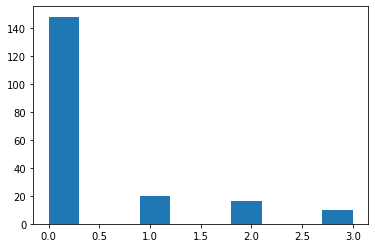

In [5]:
plt.hist(random.realised_offset)

In [6]:
assert all(random.realised_offset == random.maximum_offset)

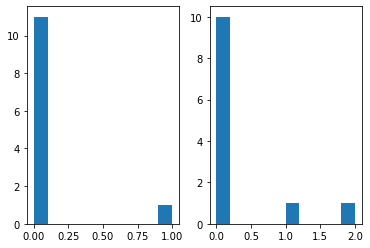

In [7]:
plt.subplot(1,2,1)
plt.hist(basin_w_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_w_flex.maximum_offset);

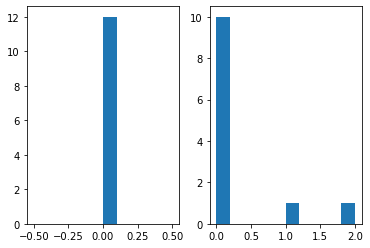

In [8]:
plt.subplot(1,2,1)
plt.hist(basin_wo_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_wo_flex.maximum_offset);

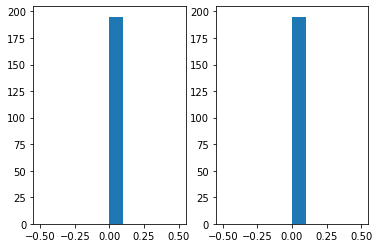

In [9]:
plt.subplot(1,2,1)
plt.hist(random_wo_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(random_wo_flex.maximum_offset);

In [5]:
print("Fraction of null projects.")
print("Random: ", np.round(sum(random.null) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.null) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.null) / len(basin_wo_flex), 2))

Fraction of null projects.
Random:  0.14
Basin with timeline flex:  0.0
Basin without timeline flex:  0.0


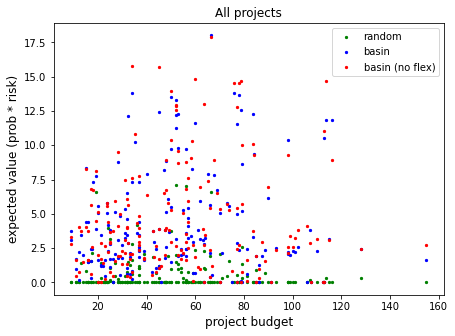

In [6]:
fs = 12
ps = 5
plt.figure(figsize=(7,5))
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

plt.scatter(basin_wo_flex.budget,
            basin_wo_flex.prob * basin_wo_flex.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

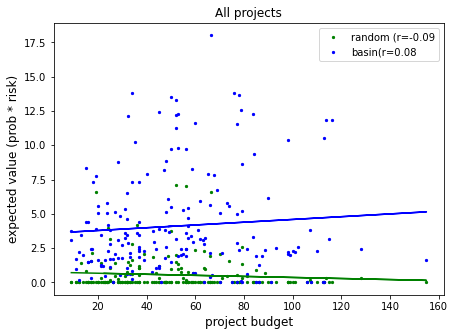

In [16]:
from scipy.stats import linregress

fs = 12
ps = 5


plt.figure(figsize=(7,5))
x = random.budget
y = random.prob * random.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='random (r=%.2f' % r_value, color='green', s=ps)
plt.plot(x, x*slope + intercept, color='green')

x = basin_w_flex.budget
y = basin_w_flex.prob * basin_w_flex.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='basin(r=%.2f' % r_value, color='blue', s=ps)
plt.plot(x, x*slope + intercept, color='blue')

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

In [8]:
random = random.loc[~random.null]
basin_w_flex = basin_w_flex.loc[~basin_w_flex.null]
basin_wo_flex = basin_wo_flex.loc[~basin_wo_flex.null]

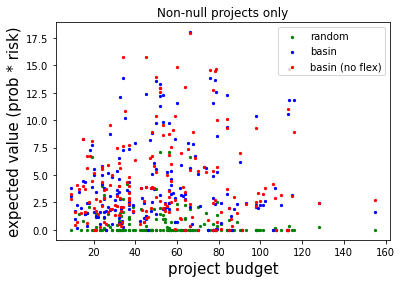

In [9]:
fs = 15
ps = 5
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

plt.scatter(basin_wo_flex.budget,
            basin_wo_flex.prob * basin_wo_flex.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("Non-null projects only")
plt.legend();

In [10]:
print("Mean probability of success.")
print("Random: ", np.round(np.mean(random.prob), 2))
print("Basin with timeline flex: ", np.round(np.mean(basin_w_flex.prob), 2))
print("Basin without timeline flex: ", np.round(np.mean(basin_wo_flex.prob), 2))

Mean probability of success.
Random:  0.07
Basin with timeline flex:  0.36
Basin without timeline flex:  0.38


In [11]:
print("Fraction of successful projects.")
print("Random: ", np.round(sum(random.success) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.success) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.success) / len(basin_wo_flex), 2))

Fraction of successful projects.
Random:  0.07
Basin with timeline flex:  0.32
Basin without timeline flex:  0.42


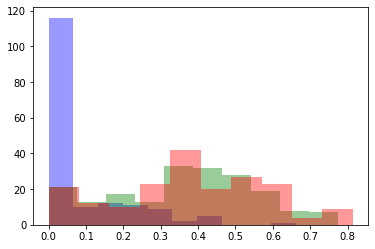

In [12]:
plt.hist(random.prob, alpha=0.4, color='blue')
plt.hist(basin_w_flex.prob, alpha=0.4, color='green')
plt.hist(basin_wo_flex.prob, alpha=0.4, color='red');

#### We check the offset distributions:

In [3]:
import sys, os
MODEL_DIR = os.path.realpath(os.path.dirname('..\superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))

from superscript_model import model
from superscript_model.utilities import Random

In [4]:
abm = model.SuperScriptModel(worker_count=100)

In [5]:
abm.inventory.max_timeline_flex

4

In [6]:
abm.inventory.timeline_flexibility_func.get_values(np.arange(abm.inventory.max_timeline_flex + 1))

array([0.5609451 , 0.25204888, 0.11325286, 0.05088779, 0.02286536])

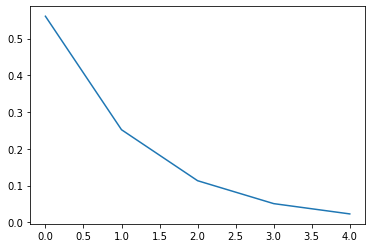

In [7]:
plt.plot(range(5), abm.inventory.timeline_flexibility_func.get_values(np.arange(abm.inventory.max_timeline_flex + 1)))

In [8]:
offsets = [abm.inventory.get_start_time_offset() for i in range(10000)]

(array([5620., 2527., 1138.,  504.,  211.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

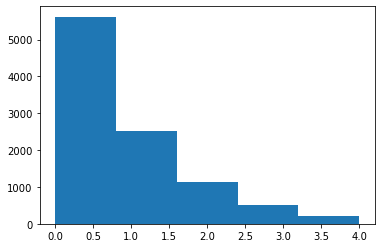

In [9]:
plt.hist(offsets, bins=5)

In [13]:
r = Random.uniform()

p_vector = abm.inventory.timeline_flexibility_func.get_values(np.arange(abm.inventory.max_timeline_flex + 1))
for i in np.flip(np.arange(1, abm.inventory.max_timeline_flex + 1)):
        print(i)
        if r <= p_vector[i]:
            #print(i)
            pass

4
3
2
1


In [14]:
p_vector

array([0.5609451 , 0.25204888, 0.11325286, 0.05088779, 0.02286536])

In [18]:
np.arange(abm.inventory.max_timeline_flex + 1)

array([0, 1, 2, 3, 4])

In [16]:
p_vector[3]

0.050887791728184834